In [1]:
import pandas as pd
import numpy as np

import  geopandas as gpd

import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
chile_pol = gpd.read_file('../shape_chile/chile_pol.shp')
chile_pol.head(2)
# center = chile_pol["the_geom"].iloc[0].centroid()
# chile_pol.rotate(-90, origin=center).plot()

,id,codreg,codpro,codcom,nom_reg,nom_pro,nom_com,MacroZona,geometry
0,23,03,033,03301,Región de Atacama,Huasco,Vallenar,1,"MULTIPOLYGON (((256460.339 6772212.650, 256469..."
1,81,13,135,13502,Región Metropolitana de Santiago,Melipilla,Alhué,3,"POLYGON ((331429.913 6241438.370, 331480.265 6..."


In [3]:
data_ = pd.read_csv('../Vitamina_D_Visualizacion_26092022.csv', delimiter=';')
data_.head(5)

,FECHA_PETICION,Año,LABORATORIO,PETICION,Identificador,SEXO,Adulto_Niño,MACROZONA,Estaciones_año,Edad,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,"22,87","5,5","10,9","0,9",NaN
1,02/01/2018 8:18,2018,SANTIAGO,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,"15,04",NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,"17,17","4,1","9,6","0,8",NaN
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,"14,44","4,3","9,6","0,6",NaN
4,02/01/2018 8:33,2018,LA SERENA,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,"15,52",NaN,NaN,"0,66",NaN


In [4]:
data_.LABORATORIO.unique()

array([' SANTIAGO', ' LA SERENA', ' VALDIVIA', ' ANTOFAGASTA',
       ' PUERTO MONTT', ' ILLAPEL', ' RANCAGUA', ' CONCEPCION', ' OVALLE',
       ' LOS ANDES', ' VIÑA DEL MAR', ' VALLENAR', ' TEMUCO', ' COPIAPO',
       ' ARICA', ' CALAMA', ' IQUIQUE', 'TALCA'], dtype=object)

In [5]:
nombres = {
   ' SANTIAGO': 'Región Metropolitana de Santiago',
   ' LA SERENA':'Región de Coquimbo',
   ' VALDIVIA': 'Región de Los Ríos',
   ' ANTOFAGASTA': 'Región de Antofagasta',
   ' PUERTO MONTT': 'Región de Los Lagos',
   ' ILLAPEL':'Región de Coquimbo',
   ' RANCAGUA':"Región del Libertador General Bernardo O'Higgins",
   ' CONCEPCION': 'Región del Biobío',
   ' OVALLE':'Región de Coquimbo',
   ' LOS ANDES': 'Región de Valparaíso',
   ' VIÑA DEL MAR':'Región de Valparaíso',
   ' VALLENAR':'Región de Atacama',
   ' TEMUCO':'Región de La Araucanía',
   ' COPIAPO':'Región de Atacama',
   ' ARICA':'Región de Arica y Parinacota',
   ' CALAMA':'Región de Antofagasta', 
   ' IQUIQUE':'Región de Tarapacá',
   'TALCA': 'Región del Maule'
}
codigos = {
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
}



In [6]:
data_['nom_reg'] = data_.LABORATORIO.map(lambda x: nombres.get(x))
data_['cod_reg'] = data_.LABORATORIO.map(lambda x: codigos.get(x))

In [7]:
center = chile_pol["geometry"].iloc[0].centroid
chile_pol.geometry = chile_pol.rotate(96, origin=center)

In [8]:
color=['#C62828', '#C62828', '#283593', '#FF9800', '#283593', '#C62828', '#283593',]
chile_pol['color'] = chile_pol.MacroZona.map(lambda x: color[x-1])

In [9]:
chile_pol.codreg=chile_pol.codreg.astype(int)
index_=[15,1,2,3,4,5,13,6,7,8,9,14,10]
chile_pol.head(2)

,id,codreg,codpro,codcom,nom_reg,nom_pro,nom_com,MacroZona,geometry,color
0,23,3,033,03301,Región de Atacama,Huasco,Vallenar,1,"MULTIPOLYGON (((623767.475 6837422.745, 623769...",#C62828
1,81,13,135,13502,Región Metropolitana de Santiago,Melipilla,Alhué,3,"POLYGON ((1143797.664 6967462.648, 1143828.872...",#283593


In [10]:
## Macrozona:
## 3 (norte) hasta coquimbo
## Valparaiso - Rancagua Centro
## Sur de Maule PTO Montt
#  

In [11]:
chile_pol.MacroZona

0     1
1     3
2     5
3     1
4     5
5     6
6     1
7     2
8     5
9     2
10    4
11    1
12    4
13    4
14    4
15    6
Name: MacroZona, dtype: int64

In [12]:
index_

[15, 1, 2, 3, 4, 5, 13, 6, 7, 8, 9, 14, 10]

In [13]:
data_['VITAMINA D'] = data_['VITAMINA D'].map(lambda x: float(x.replace(',','.')))

In [14]:
data__ = data_.pivot_table(index='nom_reg',columns='Año', values='VITAMINA D', aggfunc={'VITAMINA D':np.mean}).reset_index().set_index('nom_reg')
data__ = pd.merge(data__, chile_pol[['nom_reg','codreg']], how='left', left_on='nom_reg', right_on='nom_reg')
# data__ = data__.loc[index_,:]
# data__

In [15]:
data__=data__.set_index('codreg')
data__=data__.loc[index_,:]
data__

,nom_reg,2018,2019,2020,2021
codreg,,,,,
15,Región de Arica y Parinacota,23.444603,25.524146,23.285820,20.840833
1,Región de Tarapacá,23.923333,25.680573,23.034352,19.971640
2,Región de Antofagasta,21.371263,23.512016,23.639528,20.656813
3,Región de Atacama,21.002618,23.927678,22.627952,19.958199
4,Región de Coquimbo,21.332613,24.186933,22.366996,20.061693
5,Región de Valparaíso,19.660351,23.068020,21.931047,20.093084
13,Región Metropolitana de Santiago,21.165394,23.952148,22.331422,20.970218
6,Región del Libertador General Bernardo O'Higgins,22.240534,22.671343,20.666957,19.724457
7,Región del Maule,16.514118,22.581705,20.957959,19.520841


In [23]:
data__.mean()

/tmp/ipykernel_169203/1973510546.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data__.mean()


2018    20.432093
2019    23.163596
2020    21.782418
2021    19.956296
dtype: float64

In [17]:
data_plot = data__.set_index('nom_reg').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})

In [18]:
data_plot

,Año,nom_reg,Promedio
0,2018,Región de Arica y Parinacota,23.444603
1,2018,Región de Tarapacá,23.923333
2,2018,Región de Antofagasta,21.371263
3,2018,Región de Atacama,21.002618
4,2018,Región de Coquimbo,21.332613
5,2018,Región de Valparaíso,19.660351
6,2018,Región Metropolitana de Santiago,21.165394
7,2018,Región del Libertador General Bernardo O'Higgins,22.240534
8,2018,Región del Maule,16.514118
9,2018,Región del Biobío,18.254745


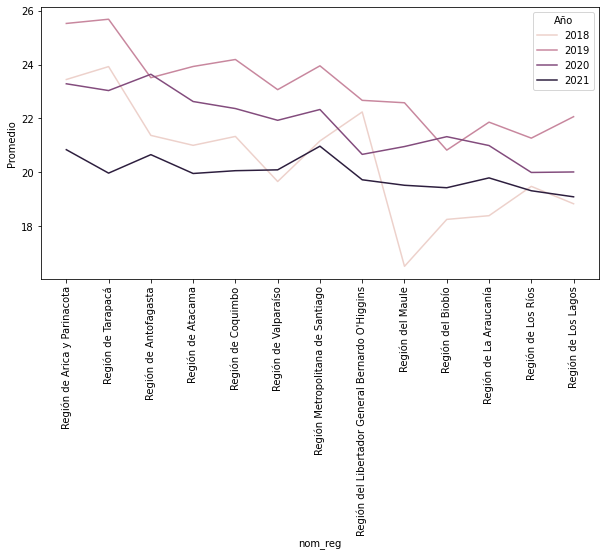

In [19]:
plt.figure(figsize=(10,5))
ax=sns.lineplot(
    data= data_plot,
    x='nom_reg',
    y='Promedio',
    hue='Año'
)
ax.tick_params(axis='x', rotation=90)



In [20]:
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace('Región del',''))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace('Región de',''))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace('Región',''))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace("Libertador General Bernardo O'Higgins",'Rancagua'))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace("Metropolitana de Santiago",'Santiago'))

In [21]:
color_anios = ['#b69797','#c97272','#a45050','#e6d089']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


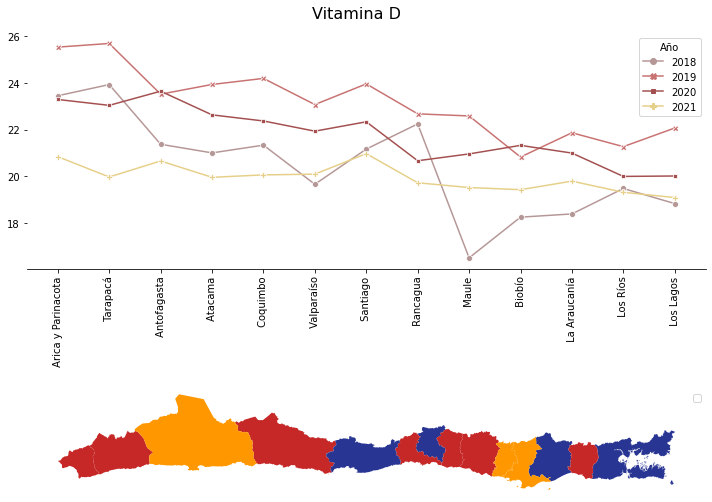

In [22]:
fig, ax = plt.subplots(2,1, figsize=(10,8))
from matplotlib.gridspec import GridSpec

fig.suptitle("Vitamina D", fontsize=16)
ax[0]=sns.lineplot(
    data= data_plot,
    x='nom_reg',
    y='Promedio',
    hue='Año',
    ax=ax[0],
    markers=True,
    dashes=False,
    style='Año',
    palette=color_anios
    # axis='x', rotation=90
    
)
ax[0].tick_params(axis='x', rotation=90)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set(ylabel=None)
ax[0].set(xlabel=None)

plt.legend(loc='upper right')

chile_pol[~chile_pol['codreg'].isin([12,11])].plot(column='MacroZona', 
    #categorical=True,
    ax=ax[1],
    color=chile_pol['color'],
    
    legend=True,
)
ax[1].set_axis_off()



plt.tight_layout()

plt.show()